**Scenario: AI Content Summarizer**

Build a graph that takes long articles and creates smart summaries.

**Task:**

1. Extract key sentences using LLM
2. Analyze sentiment (positive/negative/neutral) using LLM
3. Generate 3-sentence summary using LLM

**Requirements:**

- Use OpenAI/Anthropic LLM in nodes
- Linear flow: extract → sentiment → summarize → END
- State: article_text, key_points, sentiment, summary

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from pydantic import Field
from utils import llm_model

In [2]:
# state
class ContentState(TypedDict):
    artical: str
    key_points: str
    sentiment: Literal['positive', 'negative', 'neutral'] = Field(description="Sentiment of the article")
    summary: str
    

In [3]:
llm = llm_model()

In [4]:
llm.run('what is the capital of india').output

'bangalore'

In [5]:
# nodes

def key_points(state: ContentState):
    prompt = f"""Read the following article and extract the most important key sentences that capture the main ideas, facts, and insights.
            Select only the essential sentences without rephrasing or summarizing.
            Return the output as a bullet-point list of key sentences.
            Here is the article:
            {state['artical']}
            """
    result = llm.run(prompt).output
    state['key_points'] = result
    return state

def sentiment(state: ContentState):
    prompt = f"""Analyze the sentiment of the following article and classify it as Positive, Negative, or Neutral.
            Explain briefly which phrases or themes influenced your classification.
            Here is the article:
            {state['artical']}
            """
    state['sentiment'] = llm.run(prompt).output
    return state

def summary(state: ContentState):
    prompt = f"""Read the following article and produce a concise, clear 3-sentence summary that captures the main idea, key details, and overall conclusion of the content.
            Avoid adding new information or opinions.
            Here is the article:
            {state['artical']}
            """
    state['summary'] = llm.run(prompt).output
    return state


In [6]:
# define graph
graph = StateGraph(ContentState)

# nodes
graph.add_node("key_points", key_points)
graph.add_node('sentiment', sentiment)
graph.add_node('summary', summary)

# edges
graph.add_edge(START, 'key_points')
graph.add_edge('key_points', 'sentiment')
graph.add_edge('sentiment', 'summary')
graph.add_edge('summary', END)

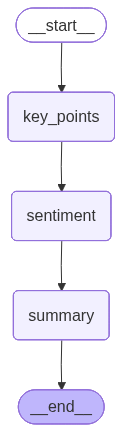

In [7]:
workflow = graph.compile()
workflow

In [8]:
# execute graph
artical1 = """Electric vehicles (EVs) are rapidly transforming the global transportation industry. 
As battery technology improves, EVs are becoming more affordable, offering longer ranges and faster charging times. 
Governments around the world are encouraging this shift by providing subsidies, building charging stations, and setting 
future deadlines to phase out petrol and diesel cars. Many major car manufacturers are also investing heavily in electric models 
to meet rising consumer demand. Beyond convenience, EVs help reduce air pollution and dependence on fossil fuels. 
While challenges like battery disposal and charging infrastructure still exist, the overall trend shows strong growth. 
In the coming years, electric vehicles are expected to dominate city roads and highways, contributing to a cleaner and more 
sustainable future.

"""

In [9]:
final = workflow.invoke({'artical': artical1})

In [10]:
final

{'artical': 'Electric vehicles (EVs) are rapidly transforming the global transportation industry. \nAs battery technology improves, EVs are becoming more affordable, offering longer ranges and faster charging times. \nGovernments around the world are encouraging this shift by providing subsidies, building charging stations, and setting \nfuture deadlines to phase out petrol and diesel cars. Many major car manufacturers are also investing heavily in electric models \nto meet rising consumer demand. Beyond convenience, EVs help reduce air pollution and dependence on fossil fuels. \nWhile challenges like battery disposal and charging infrastructure still exist, the overall trend shows strong growth. \nIn the coming years, electric vehicles are expected to dominate city roads and highways, contributing to a cleaner and more \nsustainable future.\n\n',
 'key_points': 'Electric vehicles are rapidly transforming the global transportation industry. EVs are becoming more affordable, offering lo

In [11]:
artical2 = """Urban pollution is worsening rapidly, and daily life is becoming increasingly unhealthy. Smog and toxic emissions blanket major cities, causing breathing problems and frequent hospital visits. Public transport remains unreliable, pushing more people to use private vehicles, which only adds more pollution. Government measures are slow and ineffective, allowing industries and construction sites to operate without proper controls. If this trend continues, cities may face severe health crises and long-term environmental damage, making them difficult places to live.      
        """

In [12]:
result = workflow.invoke({'artical': artical2})
result

{'artical': 'Urban pollution is worsening rapidly, and daily life is becoming increasingly unhealthy. Smog and toxic emissions blanket major cities, causing breathing problems and frequent hospital visits. Public transport remains unreliable, pushing more people to use private vehicles, which only adds more pollution. Government measures are slow and ineffective, allowing industries and construction sites to operate without proper controls. If this trend continues, cities may face severe health crises and long-term environmental damage, making them difficult places to live.      \n        ',
 'key_points': 'Urban pollution is worsening rapidly, and daily life is becoming increasingly unhealthy. Smog and toxic emissions blanket major cities, causing breathing problems and frequent hospital visits. Public transport remains unreliable, pushing more people to use private vehicles, which only adds more pollution. Government measures are slow and ineffective, allowing industries and construc

In [13]:
result['summary']

"China's cities are becoming more polluted and unhealthy."

## LangGraph 
---

### **Basic LangGraph**
**Scenario: Text Processor**

You run a content moderation system. Build a simple graph that:

1. Takes user text input
2. Counts the number of words
3. Converts text to uppercase
4. Adds a timestamp
5. Returns the processed result

**Requirements:**

- Use StateGraph
- Create 3 nodes (count_words, uppercase, add_timestamp)
- Linear flow: entry → count → uppercase → timestamp → END
- No conditions, no loops, just straight flow
---

**Scenario: AI Content Summarizer**

Build a graph that takes long articles and creates smart summaries.

**Task:**

1. Extract key sentences using LLM
2. Analyze sentiment (positive/negative/neutral) using LLM
3. Generate 3-sentence summary using LLM

**Requirements:**

- Use OpenAI/Anthropic LLM in nodes
- Linear flow: extract → sentiment → summarize → END
- State: article_text, key_points, sentiment, summary
---
